## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源，可以看到目前可使用的GPU資源
## 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

/bin/sh: 1: nvidia-smi: not found


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""


Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
## 建立你的神經網路

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 40
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 10s 197us/step - loss: 1.9338 - acc: 0.3015 - val_loss: 1.7435 - val_acc: 0.3742
Epoch 2/40
50000/50000 [==============================] - 9s 184us/step - loss: 1.6930 - acc: 0.3953 - val_loss: 1.6428 - val_acc: 0.4130
Epoch 3/40
50000/50000 [==============================] - 9s 185us/step - loss: 1.6126 - acc: 0.4245 - val_loss: 1.5691 - val_acc: 0.4387
Epoch 4/40
50000/50000 [==============================] - 9s 189us/step - loss: 1.5499 - acc: 0.4466 - val_loss: 1.5156 - val_acc: 0.4614
Epoch 5/40
50000/50000 [==============================] - 9s 185us/step - loss: 1.5008 - acc: 0.4642 - val_loss: 1.5787 - val_acc: 0.4393
Epoch 6/40
50000/50000 [==============================] - 9s 185us/step - loss: 1.4658 - acc: 0.4766 - val_loss: 1.4794 - val_acc: 0.4691
Epoch 7/40
50000/50000 [==============================] - 9s 185us/step - loss: 1.4342 - acc: 0.4884 - val_loss: 1.5032 -

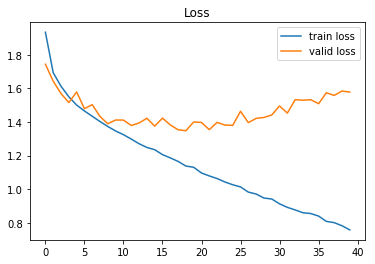

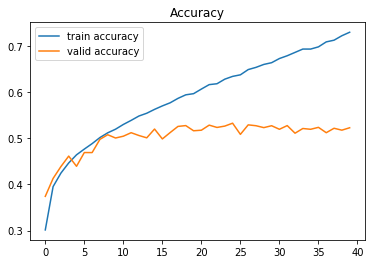

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

1. 將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢

In [12]:
train, test = keras.datasets.cifar10.load_data()

In [20]:
## 資料前處理
def preproc_x(x, flatten=True):
    #x = x / 255.
    x = (x / (x.max()-x.min()))*2-1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [21]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [22]:
x_train

array([[ 0.23137255,  0.24313725,  0.24705882, ...,  0.48235294,
         0.36078431,  0.28235294],
       [ 0.60392157,  0.69411765,  0.73333333, ...,  0.56078431,
         0.52156863,  0.56470588],
       [ 1.        ,  1.        ,  1.        , ...,  0.31372549,
         0.3372549 ,  0.32941176],
       ..., 
       [ 0.1372549 ,  0.69803922,  0.92156863, ...,  0.04705882,
         0.12156863,  0.19607843],
       [ 0.74117647,  0.82745098,  0.94117647, ...,  0.76470588,
         0.74509804,  0.67058824],
       [ 0.89803922,  0.89803922,  0.9372549 , ...,  0.63921569,
         0.63921569,  0.63137255]])

In [31]:
## 建立你的神經網路

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [32]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 40
BATCH_SIZE = 256

In [33]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [34]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 10s 202us/step - loss: 1.9366 - acc: 0.2890 - val_loss: 1.7859 - val_acc: 0.3523
Epoch 2/40
50000/50000 [==============================] - 9s 190us/step - loss: 1.7393 - acc: 0.3702 - val_loss: 1.6958 - val_acc: 0.3840
Epoch 3/40
50000/50000 [==============================] - 10s 190us/step - loss: 1.6505 - acc: 0.4063 - val_loss: 1.6633 - val_acc: 0.4008
Epoch 4/40
50000/50000 [==============================] - 9s 190us/step - loss: 1.5895 - acc: 0.4316 - val_loss: 1.5398 - val_acc: 0.4496
Epoch 5/40
50000/50000 [==============================] - 9s 189us/step - loss: 1.5380 - acc: 0.4516 - val_loss: 1.5403 - val_acc: 0.4419
Epoch 6/40
50000/50000 [==============================] - 9s 189us/step - loss: 1.5038 - acc: 0.4603 - val_loss: 1.5217 - val_acc: 0.4534
Epoch 7/40
50000/50000 [==============================] - 9s 190us/step - loss: 1.4653 - acc: 0.4782 - val_loss: 1.4782 

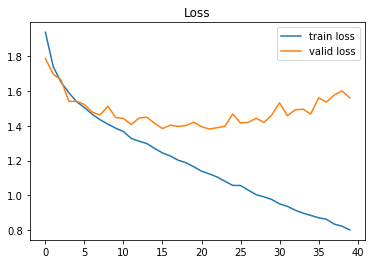

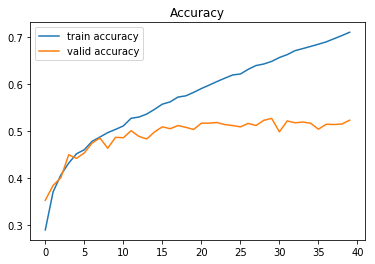

In [35]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()